In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import cv2
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D, Flatten , Dropout ,UpSampling2D
# from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
from tensorflow.keras.datasets import mnist

#loading data
(X_train,y_train),(X_test , y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


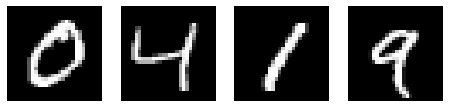

In [4]:
plt.figure(figsize = (20,10))
for i in range(1,5):
  axis = plt.subplot(1,10,i)
  plt.imshow(X_train[i].reshape(28,28), cmap = plt.get_cmap('gray'))
  plt.axis('off')
plt.show()

In [5]:
X_train.shape

(60000, 28, 28)

In [0]:
#preprocessing
X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')

X_train = X_train/255
X_test = X_test/255

In [7]:
X_train.shape

(60000, 28, 28, 1)

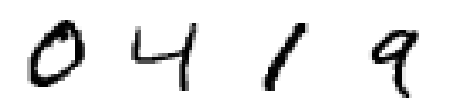

In [8]:
plt.figure(figsize = (20,10))
for i in range(1,5):
  axis = plt.subplot(1,10,i)
  plt.imshow(X_train[i].reshape(28,28) , cmap = plt.get_cmap('binary'))
  plt.axis('off')
plt.show()

In [0]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
# Adding guassian noise
noise = 0.5
mean = 0
std = 1

X_train_noise = X_train + noise * np.random.normal(loc = mean , scale = std , size = X_train.shape)
X_test_noise = X_test + noise * np.random.normal(loc = mean , scale = std , size = X_test.shape)

X_train_noise = np.clip(X_train_noise , 0.0 ,1.0)
X_test_noise = np.clip(X_test_noise , 0.0 , 1.0)

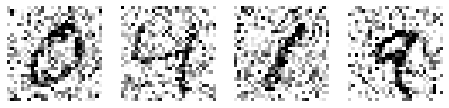

In [12]:
#plotting noisy images
plt.figure(figsize = (20,10))
for i in range(1,5):
  axis = plt.subplot(1,10,i)
  plt.imshow(X_train_noise[i].reshape(28,28) , cmap = plt.get_cmap('binary'))
  plt.axis('off')
plt.show()

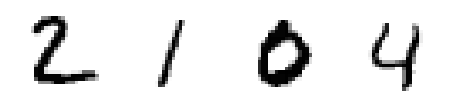

In [13]:

plt.figure(figsize = (20,10))
for i in range(1,5):
  axis = plt.subplot(1,10,i)
  plt.imshow(X_test[i].reshape(28,28) , cmap = plt.get_cmap('binary'))
  plt.axis('off')

plt.show()

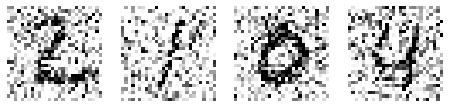

In [0]:
plt.figure(figsize = (20,10))
for i in range(1,5):
  axis = plt.subplot(1,10,i)
  plt.imshow(X_test_noise[i].reshape(28,28) , cmap = plt.get_cmap('binary'))
  plt.axis('off')

plt.show()

In [0]:
# creating auto encoder cnn model  that converts noisy images to normal images
def base_model():
  model = Sequential()
  # Encoding phase
  model.add(Conv2D(32 , kernel_size = (3,3) , kernel_initializer = 'he_normal' ,padding = 'same', input_shape = (28,28,1) , activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2) , padding = 'same'))
  model.add(Conv2D(16, kernel_size = (3,3) , activation = 'relu' , padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2,2) , padding = 'same'))
  model.add(Conv2D(8 , kernel_size = (3,3) , activation = 'relu' , padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2,2) , padding = 'same'))

  model.add(Conv2D(8 , kernel_size = (3,3) , activation = 'relu' , padding = 'same'))
  #Decoding Phase
  model.add(Conv2D(8 , kernel_size = (3,3) , activation ='relu' , padding = 'same'))
  model.add(UpSampling2D((2,2)))
  model.add(Conv2D(16 , kernel_size = (3,3) , activation = 'relu' , padding = 'same'))  
  model.add(UpSampling2D((2,2)))
  model.add(Conv2D(32 , kernel_size = (3,3) , activation = 'relu' ))
  model.add(UpSampling2D((2,2)))
  model.add(Conv2D(1 , kernel_size = (3,3) , activation = 'relu' , padding = 'same'))

  

  #Compiling the model
  model.compile(loss = 'mean_squared_error' ,optimizer = 'adam' , metrics = ['accuracy'])
  model.summary()

  return model

In [31]:
# training the model
model = base_model()
# model.fit(X_train, y_train , validation_data = (X_test , y_test) , epochs = 10 , batch_size = 200 , verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)          

In [32]:
# fitting the model
encoder_history = model.fit(X_train_noise , X_train , validation_data = (X_test_noise , X_test) , shuffle = True , epochs = 10 , verbose = 2 , batch_size = 256)

Epoch 1/10
235/235 - 5s - loss: 0.0517 - accuracy: 0.7986 - val_loss: 0.0377 - val_accuracy: 0.8000
Epoch 2/10
235/235 - 4s - loss: 0.0340 - accuracy: 0.8032 - val_loss: 0.0305 - val_accuracy: 0.8046
Epoch 3/10
235/235 - 4s - loss: 0.0294 - accuracy: 0.8053 - val_loss: 0.0276 - val_accuracy: 0.8046
Epoch 4/10
235/235 - 4s - loss: 0.0270 - accuracy: 0.8065 - val_loss: 0.0258 - val_accuracy: 0.8070
Epoch 5/10
235/235 - 4s - loss: 0.0254 - accuracy: 0.8073 - val_loss: 0.0244 - val_accuracy: 0.8070
Epoch 6/10
235/235 - 4s - loss: 0.0242 - accuracy: 0.8079 - val_loss: 0.0236 - val_accuracy: 0.8085
Epoch 7/10
235/235 - 4s - loss: 0.0233 - accuracy: 0.8083 - val_loss: 0.0228 - val_accuracy: 0.8087
Epoch 8/10
235/235 - 4s - loss: 0.0226 - accuracy: 0.8086 - val_loss: 0.0227 - val_accuracy: 0.8095
Epoch 9/10
235/235 - 4s - loss: 0.0221 - accuracy: 0.8089 - val_loss: 0.0216 - val_accuracy: 0.8086
Epoch 10/10
235/235 - 4s - loss: 0.0216 - accuracy: 0.8091 - val_loss: 0.0210 - val_accuracy: 0.8085

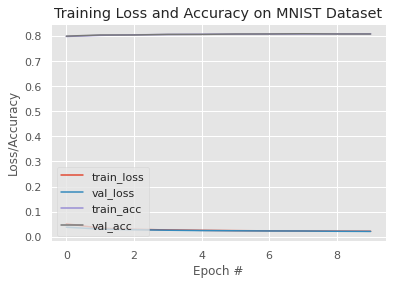

In [43]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), encoder_history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), encoder_history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), encoder_history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), encoder_history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on MNIST Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

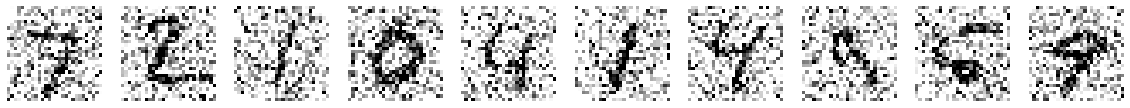

In [34]:
no_noise_image = model.predict(X_test_noise)
# Noisy images
plt.figure(figsize = (20,10))
for i in range(0,10):
  axis = plt.subplot(1,10,i+1)
  plt.imshow(X_test_noise[i].reshape(28,28) , cmap = plt.get_cmap('binary'))

  plt.axis('off')

plt.show()

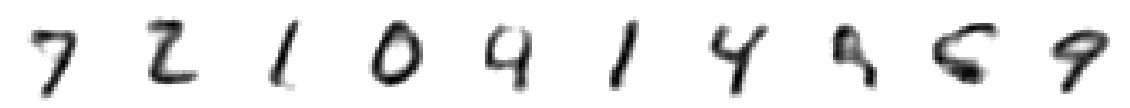

In [35]:
# Denoisy images after converting

plt.figure(figsize = (20,10))
for i in range(0,10):
  axis = plt.subplot(1,10,i+1)
  plt.imshow(no_noise_image[i].reshape(28,28) , cmap = plt.get_cmap('binary'))
  plt.axis('off')
plt.show()

In [0]:
#saving the model
model.save("mnist_autoencoder_noise.h5")

In [0]:
# adding flatten layers to classify the digits
def add_base_model():

  model.add(Flatten())
  model.add(Dense(100,activation = 'relu'))
  model.add(Dense(10 , activation = 'softmax'))
  model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
  model.summary()

  return model


In [38]:
model = add_base_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)          

In [41]:
# fitting the model for classification
classify_model = model.fit(X_train_noise , y_train , validation_data = (X_test_noise , y_test) , epochs=20,batch_size = 256 , verbose = 2 , shuffle =True)

Epoch 1/20
235/235 - 5s - loss: 0.0981 - accuracy: 0.9672 - val_loss: 0.1328 - val_accuracy: 0.9597
Epoch 2/20
235/235 - 5s - loss: 0.0995 - accuracy: 0.9658 - val_loss: 0.1312 - val_accuracy: 0.9582
Epoch 3/20
235/235 - 5s - loss: 0.0893 - accuracy: 0.9703 - val_loss: 0.1318 - val_accuracy: 0.9592
Epoch 4/20
235/235 - 5s - loss: 0.0843 - accuracy: 0.9714 - val_loss: 0.1385 - val_accuracy: 0.9551
Epoch 5/20
235/235 - 5s - loss: 0.0832 - accuracy: 0.9716 - val_loss: 0.1471 - val_accuracy: 0.9531
Epoch 6/20
235/235 - 5s - loss: 0.0777 - accuracy: 0.9736 - val_loss: 0.1449 - val_accuracy: 0.9545
Epoch 7/20
235/235 - 5s - loss: 0.0754 - accuracy: 0.9745 - val_loss: 0.1390 - val_accuracy: 0.9568
Epoch 8/20
235/235 - 5s - loss: 0.0699 - accuracy: 0.9753 - val_loss: 0.1481 - val_accuracy: 0.9554
Epoch 9/20
235/235 - 5s - loss: 0.0678 - accuracy: 0.9766 - val_loss: 0.1534 - val_accuracy: 0.9550
Epoch 10/20
235/235 - 5s - loss: 0.0648 - accuracy: 0.9778 - val_loss: 0.1498 - val_accuracy: 0.9571

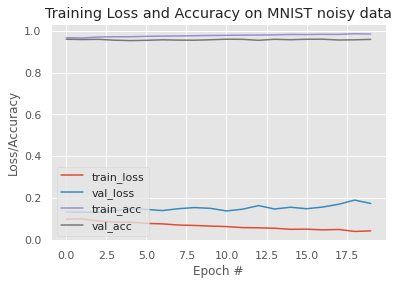

In [42]:
#plotting validation loss and training loss and accuracies
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), classify_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), classify_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), classify_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), classify_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on MNIST noisy data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [46]:
#predicting the model
model.evaluate(X_test_noise , y_test , verbose = 0)

[0.17329271137714386, 0.958899974822998]